# Linear Regression

In [1]:
from statsmodels.regression.linear_model import OLS
import pandas as pd, numpy as np, matplotlib.pyplot as plt


**1. Auto dataset - simple linear regression**

*(a) perform a simple linear regression with mpg as the response and horsepower as the predictor. Comment on the output.*

We're going to use the python statsmodels library to implement the simple linear regression. First we load and set up our data so it is ready to be passed to the model. Our response variable, *y*, is mpg and our predictor, *X* is horsepower we also include a column of ones to represent the intercept. The summary of the model is displayed below.

The coefficient for horsepower is negative. On average, for every one unit increase in horsepower there is an associated 0.16 units decrease in the miles per gallon. Furthermore, the t-statistic is -24.5 which given the standard error of the estimate leads to a p-value < 0.001. This suggests that there is very strong evidence agaisnt the null hypothesis that there is no association between miles per gallon and horsepower. The $R^{2}$ statistic is moderately large indicating the regression line is a relatively good fit to the data.

In [2]:
auto_df = pd.read_csv(r'C:\Users\caine\OneDrive\Documents\statistical_learning_problems\0 datasets\Auto.csv', na_values=['?'])
auto_df = auto_df.dropna()

In [3]:
#simple linear regression
y = auto_df['mpg']
X = auto_df[['horsepower']]
X['intercept'] = np.ones(X.shape[0])

linear_model = OLS(y, X)
linear_results = linear_model.fit()
linear_results.summary()


C:\Users\caine\AppData\Local\Temp\ipykernel_8484\10707891.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = np.ones(X.shape[0])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 15 May 2024   Prob (F-statistic):           7.03e-81
Time:                        20:52:36   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*(b) Plot the response and the predictor in a new set of axes. Also display the least squares regression line.*

We use matplotlib to plot the data and the regression line. Now we have visualised the data we can see that a linear model is not the correct choice to capture the relationship between a the horsepower of a car and its mpg. Specifically note that for cars with both low and high horsepower our model will tend to underestimate the mpg and overestimate the mpg for values in between.  We can visualise this by examining the residuals.

C:\Users\caine\AppData\Local\Temp\ipykernel_8484\936147316.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_lim = [linear_results.params[1] + linear_results.params[0]*x_lim[0], linear_results.params[1] + linear_results.params[0]*x_lim[1]] #start and end of the regression line


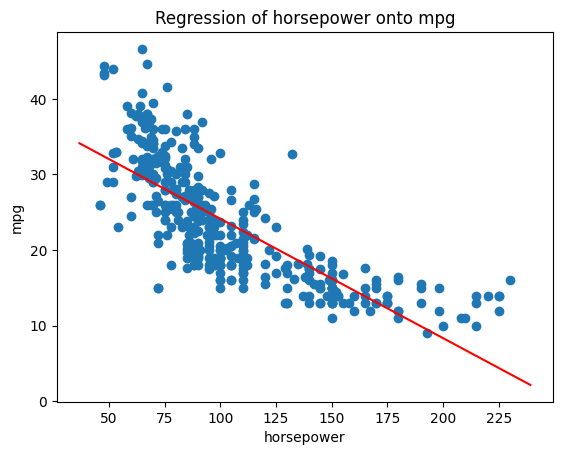

In [4]:
figure = plt.figure()
ax = figure.add_subplot()

ax.set_title('Regression of horsepower onto mpg')
ax.set_xlabel('horsepower')
ax.set_ylabel('mpg')

#plot the data
ax.scatter(X['horsepower'], y)

#plot the regression line
x_lim = ax.get_xlim()
y_lim = [linear_results.params[1] + linear_results.params[0]*x_lim[0], linear_results.params[1] + linear_results.params[0]*x_lim[1]] #start and end of the regression line
ax.plot(x_lim, y_lim, c='red')


*(c) Produce some diagnostic plots of the least squared regression fit. Comment on any problems*

We can diagnose the regression fit by visualising the residuals. The residuals are equal to the observed value of y minus the fitted value. That is,

$$
\epsilon_{i} = \hat{y}_{i} - y_{i}
$$

Immediately we notice there is a clear pattern in the residual plot, it is a U-shape. This is a warning signal that our data is non-linear. Remember, in linear regression we expect errors to be follow a normal distribution with a mean of 0

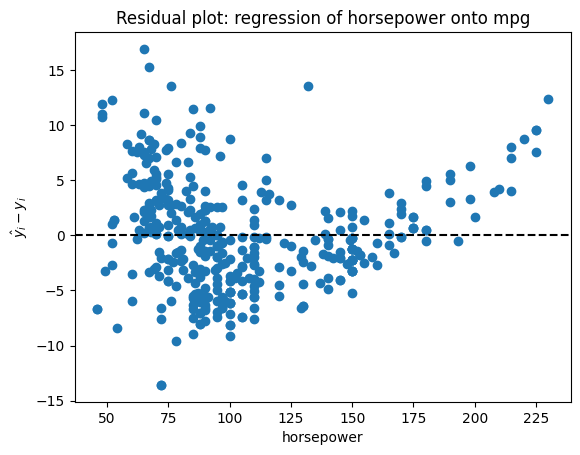

In [5]:
figure = plt.figure()
ax = figure.add_subplot()

ax.set_title('Residual plot: regression of horsepower onto mpg')
ax.set_ylabel('$\hat{y}_{i} - y_{i}$')
ax.set_xlabel('horsepower')

ax.scatter(x=X['horsepower'], y=linear_results.resid)
ax.axhline(0, ls='--', c='k')


**2. Auto dataset - multiple linear regression**

*(a) Produce a scatterplot matrix which includes all of the variables in the data set.*

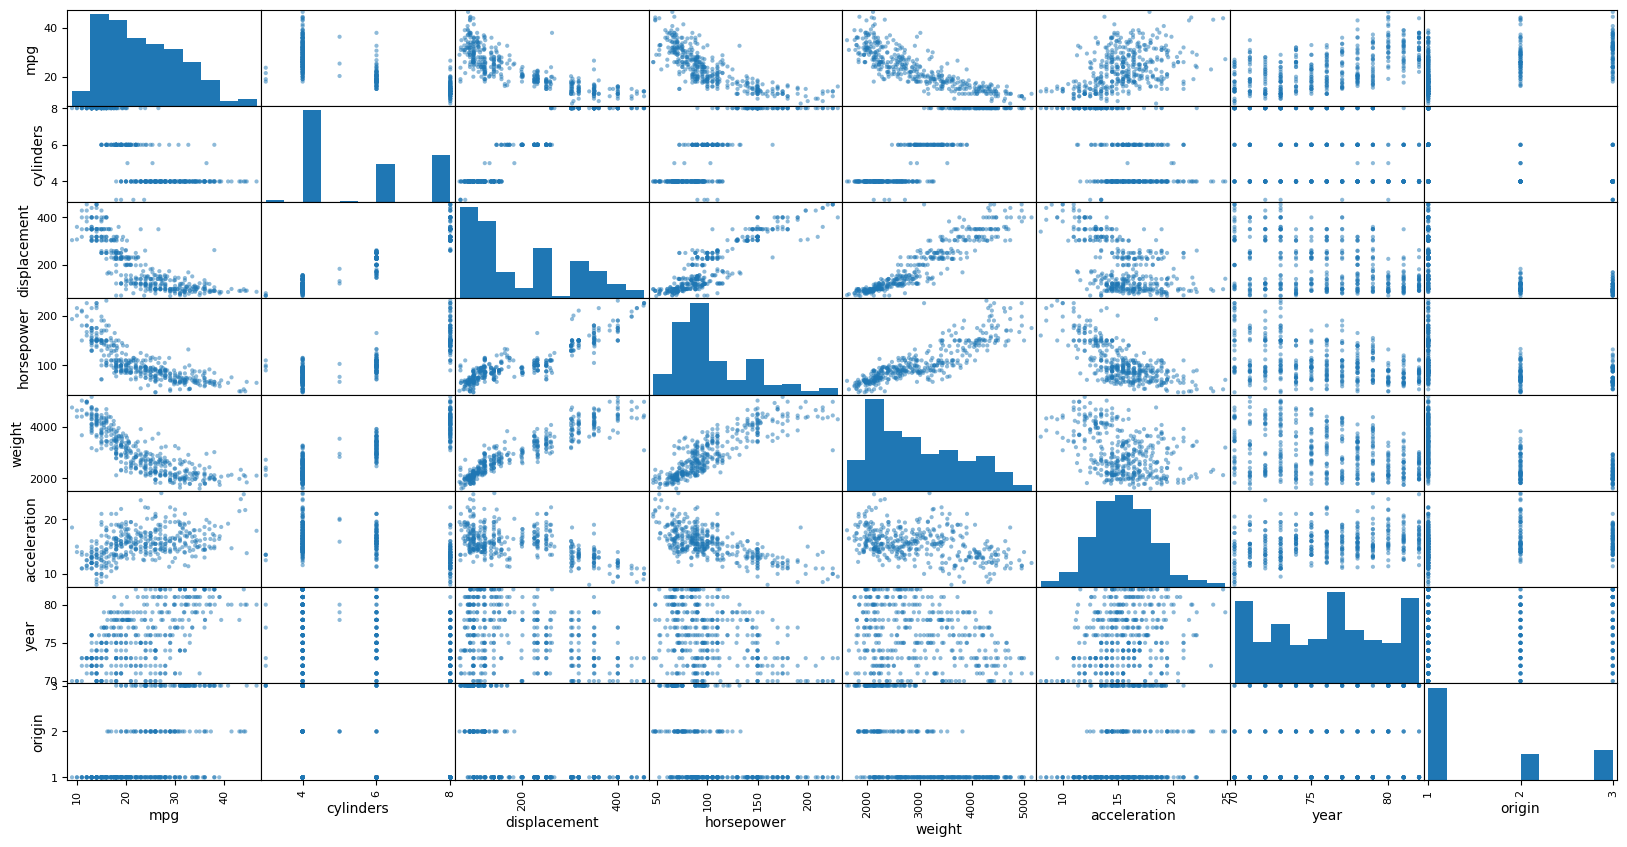

In [6]:
pd.plotting.scatter_matrix(auto_df, figsize=(20,10));

*(b) Compute the matrix of correlations between the variables.*

In [7]:
auto_df.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


*(c) Perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Comment on the output.*

To perform a multiple linear regression we use the OLS object we imported from statsmodel, except this time X will contain all the predictors except name. If we think about it, there shouldn't really be an intercept in this model. A car with no weight, no cylinders and no horsepower can't have any mpg - in fact there would be car at all. For this reason we model without an intercept. 

Firstly, note the F-statistic. This statistic can be used to test the hypothesis that all the coefficients are actually zero. In other words, it will tell us if at least one of the predictors has a statistically significant relationship with the response. When the null is true the F-statistic is equal to one, large positive values of the F-statistic are evidence agaisnt the null, how large depends on n and p (number of observations and the number of predictions). The model out puts gives and F-statistic of 2933 and a probability of observing this statistic given the null is true of essentially zero. Hence we can conclude that at least one of the predictors has a true association with the response. Now we move onto examining the individual predictors.

We see that both acceleration and the number of cylinders have very high p-values. Looking at the scatter matrix above there it is clear that there is no relationship between acceleration and mpg. However, there does appear to be a strong negative relationship between the number of cylinders and mpg. This could be caused by collinnearity between the predictors. We can see that weight, displacement, horsepower, and cylinders are highly correlated. This would also explain why weight has a negative coefficient whereas displacement has a positive coefficient despite these two predictors having a correlation of 0.93


In [8]:
X = auto_df[auto_df.columns.drop(['mpg', 'name'])] #drop the response and name


multiple_linear_regression = OLS(y, X)
multiple_linear_results = multiple_linear_regression.fit()
multiple_linear_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              2933.
Date:                Wed, 15 May 2024   Prob (F-statistic):                        0.00
Time:                        20:52:38   Log-Likelihood:                         -1030.4
No. Observations:                 392   AIC:                                      2075.
Df Residuals:                     385   BIC:                                      2103.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.7055      0.323     -2.181      0.030      -1.341      -0.070
displacement     0.0219      0.008      2.871      0.004       0.007       0.037
horsepower      -0.0396      0.013     -3.147      0.002      -0.064      -0.015
weight          -0.0060      0.001     -9.258      0.000      -0.007      -0.005
acceleration    -0.0796      0.090     -0.881      0.379      -0.257       0.098
year             0.5836      0.024     24.150      0.000       0.536       0.631
origin           1.3100      0.281      4.663      0.000       0.758       1.862
==============================================================================
Omnibus:                       46.837   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.015
Skew:                           0.681   Prob(JB):                     2.84e-20
Kurtosis:                       4.912   Cond. No.                     6.00e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large,  6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*(d) Produce some of diagnostic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?*

We will produce a plot of residuals agaisnt the fitted values, the studentised residuals against the fitted values, the leverage stats agaisnt the residuals and also a table of the variance inflation factor values for each predictor. The VIF helps to check multicollinearity problems where 3 or more predictors are highly correlated. The studentised residuals can be obtained using the OLSInfluence object provided by statsmodels, the VIF can be calculate using the variance_inflation_factor function also provided by statsmodel

The residuals plot exhibits a clear pattern, this is an indication that the relationship between response and predictors is non-linear. The Studentised residuals plot identifies five outliers (any points outside of black dashed lines are likely to be outliers). If we were extending this model further we might remove these outliers and see the effect on the model performance. The leverage plot indicates observation 13 may be disproportionately influencing the regression predictions. The VIF table indicates high multicolinnearit between our predictors, especially weight, cylinders, year and displacement. To improve this model we might consider how we can combine these predictors to create a new feature.



In [9]:
from statsmodels.stats.outliers_influence import OLSInfluence, variance_inflation_factor
from statsmodels.graphics.regressionplots import plot_leverage_resid2

C:\Users\caine\AppData\Local\Temp\ipykernel_8484\1417525397.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_leverage_resid2(multiple_linear_results, ax=ax[2]).show()


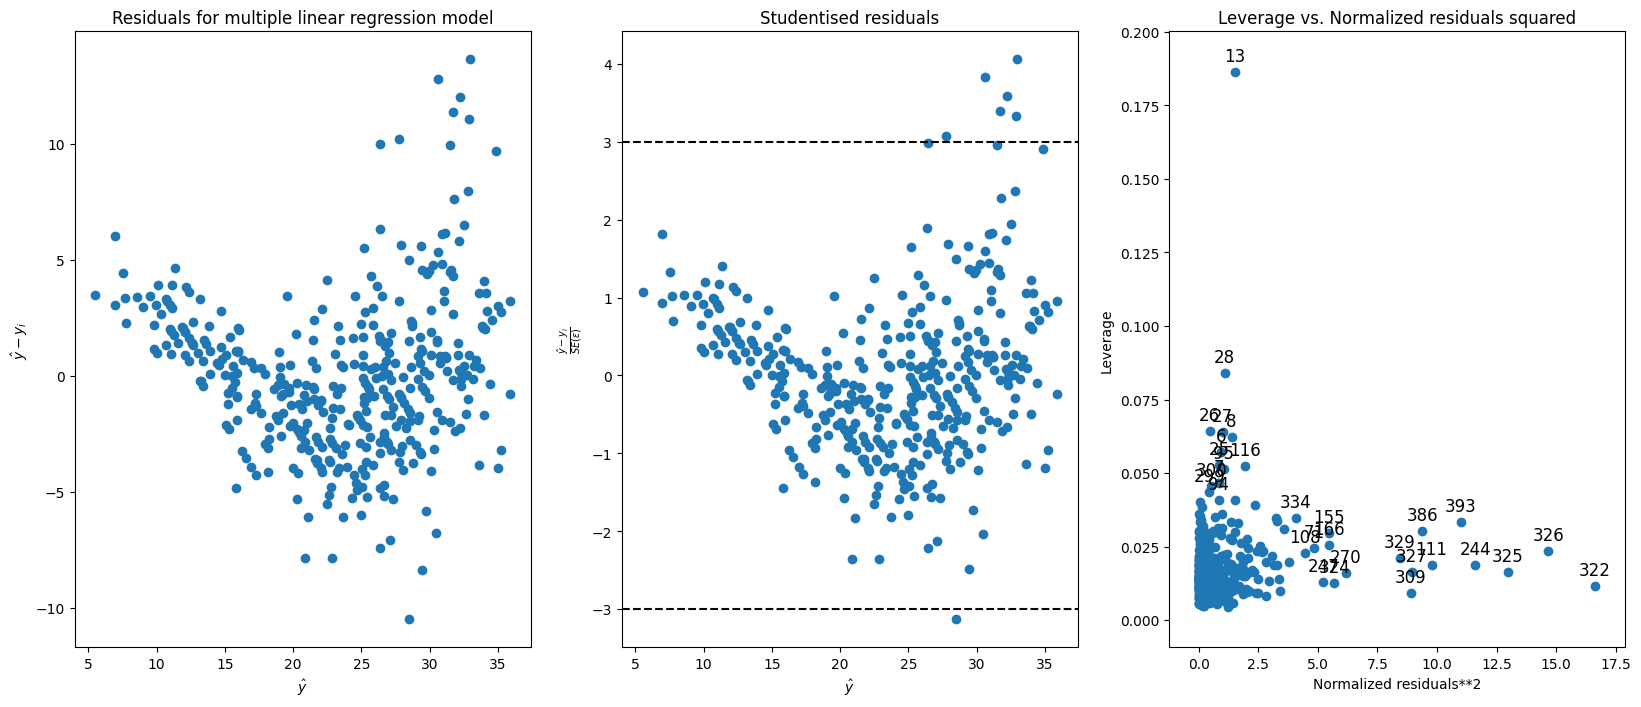

In [10]:
figure, ax = plt.subplots(1,3, figsize=(20,8))

ax[0].set_title('Residuals for multiple linear regression model')
ax[0].set_xlabel('$\hat{y}$')
ax[0].set_ylabel('$\hat{y} - y_{i}$')
ax[0].scatter(multiple_linear_results.fittedvalues, y=multiple_linear_results.resid)

influence_metrics = OLSInfluence(multiple_linear_results)
ax[1].set_title('Studentised residuals')
ax[1].set_xlabel('$\hat{y}$')
ax[1].set_ylabel(r'$\frac{\hat{y} - y_{i}}{SE(\epsilon)}$')
ax[1].scatter(multiple_linear_results.fittedvalues, influence_metrics.resid_studentized)
ax[1].axhline(3, ls='--', c='k')
ax[1].axhline(-3, ls='--', c='k')

ax[2].set_title('Cooks distance')
ax[2].set_xlabel('Leverage')
ax[2].set_ylabel(r'$\frac{\hat{y} - y_{i}}{SE(\epsilon)}$')
plot_leverage_resid2(multiple_linear_results, ax=ax[2]).show()


In [11]:
vifs = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif_df = pd.DataFrame(data={'vif': vifs}, index=X.columns)
vif_df.sort_values('vif', ascending=False)



,vif
weight,139.454162
cylinders,117.708547
year,115.794614
displacement,96.909762
acceleration,69.699769
horsepower,67.072154
origin,8.469942


*(e) Fit some models with interactions. Do any interactions appear to be statistically significant?*

Including an interaction term removes the additive assumption of a linear regression model. That is, the response is no longer the sum of the isolated effects of the predictors. When we include an interaction term the value of one predictor can change the effect of another. The linear regression model with an interaction term is,

$$
Y = \beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2} + \beta_{3}X_{1}X_{2}
$$
$$
Y = \beta_{0} + X_{1}(\beta_{1} + \beta_{3}X_{2}) + \beta_{2}X_{2}
$$

We can interpret $\beta_{3}$ as the association between the response and $X_{1}$ when $X_{2}$ changes.

We can fit an interaction term simply by multiplying two features. When fitting an interaction term we should always retain the main effects. Lets create some hypotheses for interactions we think will be statistically significant and fit the models.

1. An interaction between weight and horspower. Increasing the weight of a car could cause the effect of extra horsepower on mpg to increase. We are looking for a positive coefficient for the predictor *Weight x Horspower*

2. An interaction between year and weight. Newer models are likely to be more efficient reducing the impact of weight on the mpg. We expect a negative coefficient for the predictor *Year x Weight*

In [12]:
X = auto_df[['weight', 'horsepower']]
X['Weight*Horsepower'] = X['weight'] * X['horsepower']

weight_horsepower_interaction_model = OLS(y, X)
weight_horsepower_interaction_result = weight_horsepower_interaction_model.fit()
weight_horsepower_interaction_result.summary()

C:\Users\caine\AppData\Local\Temp\ipykernel_8484\4143872911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Weight*Horsepower'] = X['weight'] * X['horsepower']


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.927
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                              1658.
Date:                Wed, 15 May 2024   Prob (F-statistic):                   3.56e-221
Time:                        20:52:39   Log-Likelihood:                         -1299.2
No. Observations:                 392   AIC:                                      2604.
Df Residuals:                     389   BIC:                                      2616.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
weight                0.0076      0.001     12.015      0.000       0.006       0.009
horsepower            0.3852      0.024     16.250      0.000       0.339       0.432
Weight*Horsepower    -0.0001   3.55e-06    -33.194      0.000      -0.000      -0.000
==============================================================================
Omnibus:                       28.986   Durbin-Watson:                   0.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.701
Skew:                           0.715   Prob(JB):                     4.81e-08
Kurtosis:                       3.130   Cond. No.                     2.84e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
X = auto_df[['year', 'weight']]
X['Year*Weight'] = X['year'] * X['weight']

year_weight_interaction_model = OLS(y, X)
year_weight_interaction_result = year_weight_interaction_model.fit()
year_weight_interaction_result.summary()



C:\Users\caine\AppData\Local\Temp\ipykernel_8484\203309456.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Year*Weight'] = X['year'] * X['weight']


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              6475.
Date:                Wed, 15 May 2024   Prob (F-statistic):                        0.00
Time:                        20:52:39   Log-Likelihood:                         -1043.0
No. Observations:                 392   AIC:                                      2092.
Df Residuals:                     389   BIC:                                      2104.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
year            0.5764      0.009     63.316      0.000       0.558       0.594
weight         -0.0087      0.001     -6.662      0.000      -0.011      -0.006
Year*Weight  2.461e-05   1.85e-05      1.328      0.185   -1.18e-05    6.11e-05
==============================================================================
Omnibus:                       50.172   Durbin-Watson:                   1.211
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.740
Skew:                           0.752   Prob(JB):                     3.26e-20
Kurtosis:                       4.798   Cond. No.                     1.21e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*(f) Try a few different transformations of the variables, such as $log(X)$, $\sqrt{X}$, $X^{2}$. Comment on your findings.*

The summary of the three models are below. The best performing model was the log transformation. All three transformations have significantly improved the $R^{2}$ statistic indicating a better fit. Also the residual plot reveal that the pattern previosuly observed has no disappeared. However we do notice some fanning out of the residuals as the fitted values increase indicating we may have heteroskedascity (non constant variance of the error term). To address this problem we could log transform the response variable.

In [14]:
X = auto_df[auto_df.columns.drop(['name', 'mpg'])]
log_x = np.log(X)
log_x.columns = [i + '_log' for i in log_x.columns]
root_x = np.sqrt(X)
root_x.columns = [i + '_root' for i in root_x.columns]
squared_x = np.power(X, 2)
squared_x.columns = [i + '_squared' for i in squared_x.columns]

log_X = pd.concat([log_x, X], axis=1)
root_X = pd.concat([root_x, X], axis=1)
squared_X = pd.concat([squared_x, X], axis=1)


In [15]:
log_model = OLS(y, log_X)
log_results = log_model.fit()
log_results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              1991.
Date:                Wed, 15 May 2024   Prob (F-statistic):                        0.00
Time:                        20:52:39   Log-Likelihood:                         -967.83
No. Observations:                 392   AIC:                                      1964.
Df Residuals:                     378   BIC:                                      2019.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
cylinders_log        8.3217      8.082      1.030      0.304      -7.569      24.212
displacement_log    -2.8994      3.521     -0.823      0.411      -9.823       4.024
horsepower_log     -12.4342      4.113     -3.023      0.003     -20.521      -4.347
weight_log         -22.8908      8.050     -2.844      0.005     -38.719      -7.062
acceleration_log   -21.4292      8.466     -2.531      0.012     -38.076      -4.782
year_log            70.3647     14.886      4.727      0.000      41.094      99.635
origin_log           1.5407      3.206      0.481      0.631      -4.762       7.844
cylinders           -1.5969      1.450     -1.101      0.271      -4.448       1.254
displacement         0.0098      0.017      0.586      0.559      -0.023       0.043
horsepower           0.0590      0.035      1.696      0.091      -0.009       0.127
weight               0.0037      0.002      1.497      0.135      -0.001       0.009
acceleration         1.1225      0.538      2.086      0.038       0.065       2.180
year                -0.1357      0.198     -0.685      0.494      -0.525       0.254
origin              -0.2437      1.760     -0.139      0.890      -3.704       3.216
==============================================================================
Omnibus:                       30.043   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.752
Skew:                           0.434   Prob(JB):                     6.42e-14
Kurtosis:                       4.722   Cond. No.                     3.74e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
root_model = OLS(y, root_X)
root_results = root_model.fit()
root_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              2016.
Date:                Wed, 15 May 2024   Prob (F-statistic):                        0.00
Time:                        20:52:39   Log-Likelihood:                         -965.47
No. Observations:                 392   AIC:                                      1959.
Df Residuals:                     378   BIC:                                      2015.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
cylinders_root       15.1177     13.654      1.107      0.269     -11.731      41.966
displacement_root    -0.8990      1.047     -0.859      0.391      -2.957       1.159
horsepower_root      -4.3768      1.588     -2.757      0.006      -7.499      -1.255
weight_root          -1.8827      0.582     -3.233      0.001      -3.028      -0.738
acceleration_root   -22.6796      8.735     -2.596      0.010     -39.856      -5.503
year_root            19.9244      6.114      3.259      0.001       7.902      31.947
origin_root           6.5308      9.574      0.682      0.496     -12.294      25.356
cylinders            -3.1933      2.851     -1.120      0.263      -8.798       2.412
displacement          0.0265      0.034      0.775      0.439      -0.041       0.094
horsepower            0.1515      0.071      2.143      0.033       0.012       0.290
weight                0.0130      0.005      2.600      0.010       0.003       0.023
acceleration          2.6226      1.091      2.404      0.017       0.478       4.767
year                 -0.3475      0.360     -0.964      0.336      -1.056       0.361
origin               -1.8015      3.490     -0.516      0.606      -8.664       5.061
==============================================================================
Omnibus:                       30.748   Durbin-Watson:                   1.537
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.058
Skew:                           0.440   Prob(JB):                     2.03e-14
Kurtosis:                       4.757   Cond. No.                     3.05e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
squared_model = OLS(y, squared_X)
squared_results = squared_model.fit()
squared_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              2041.
Date:                Wed, 15 May 2024   Prob (F-statistic):                        0.00
Time:                        20:52:39   Log-Likelihood:                         -963.03
No. Observations:                 392   AIC:                                      1954.
Df Residuals:                     378   BIC:                                      2010.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
cylinders_squared       -0.0515      0.119     -0.432      0.666      -0.286       0.183
displacement_squared  3.094e-05   4.05e-05      0.764      0.445   -4.86e-05       0.000
horsepower_squared       0.0004      0.000      2.624      0.009    9.69e-05       0.001
weight_squared          1.5e-06    3.8e-07      3.947      0.000    7.53e-07    2.25e-06
acceleration_squared     0.0507      0.017      2.970      0.003       0.017       0.084
year_squared            -0.0023      0.001     -1.677      0.094      -0.005       0.000
origin_squared          -0.3621      0.463     -0.782      0.435      -1.273       0.549
cylinders                0.8632      1.474      0.586      0.559      -2.035       3.762
displacement            -0.0190      0.023     -0.809      0.419      -0.065       0.027
horsepower              -0.1524      0.043     -3.519      0.000      -0.238      -0.067
weight                  -0.0138      0.003     -4.928      0.000      -0.019      -0.008
acceleration            -1.8371      0.578     -3.176      0.002      -2.974      -0.700
year                     1.1500      0.190      6.063      0.000       0.777       1.523
origin                   2.0711      1.898      1.091      0.276      -1.661       5.803
==============================================================================
Omnibus:                       30.375   Durbin-Watson:                   1.541
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.101
Skew:                           0.419   Prob(JB):                     7.30e-15
Kurtosis:                       4.812   Cond. No.                     1.50e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.5e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Squared residuals')

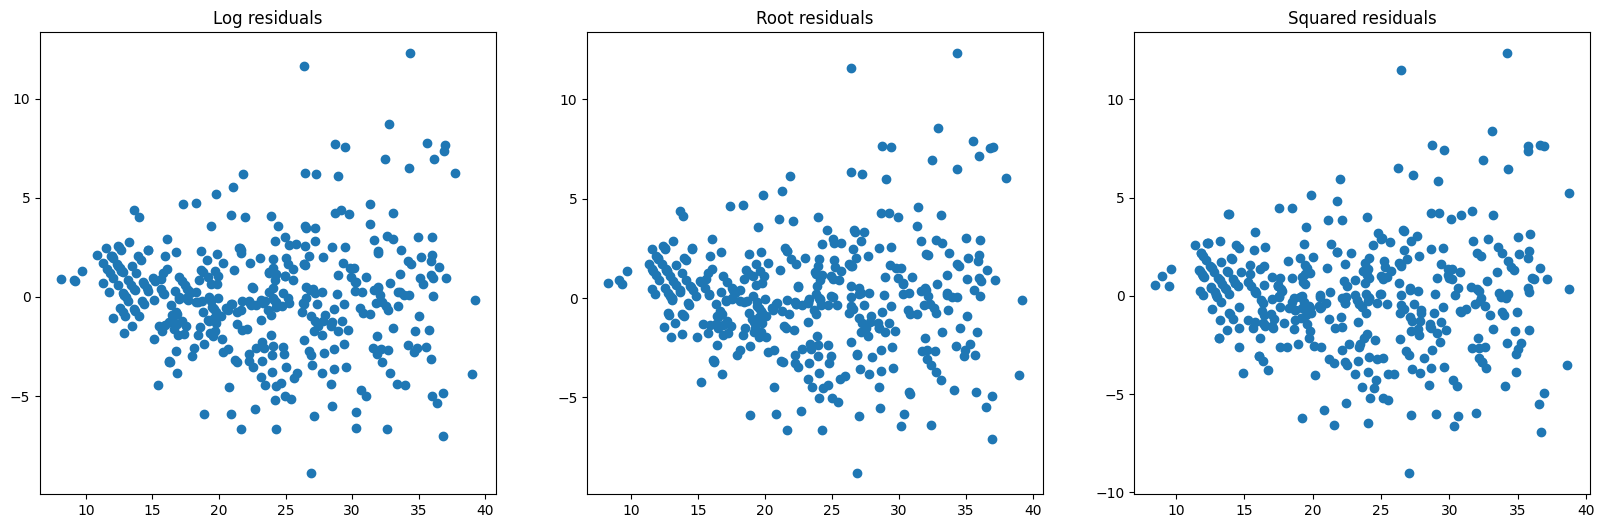

In [18]:
figure, ax = plt.subplots(1, 3, sharey=False, figsize=(20, 6))

ax[0].scatter(x=log_results.fittedvalues, y=log_results.resid)
ax[0].set_title('Log residuals')
ax[1].scatter(x=root_results.fittedvalues, y=root_results.resid)
ax[1].set_title('Root residuals')
ax[2].scatter(x=squared_results.fittedvalues, y=squared_results.resid)
ax[2].set_title('Squared residuals')


**2. Carseats Dataset**

In [19]:
carseats = pd.read_csv(r'C:\Users\caine\OneDrive\Documents\statistical_learning_problems\0 datasets\Carseats.csv')

In [20]:
carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [21]:
carseats.shape

(400, 11)

In [22]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [23]:
carseats['Urban'] = carseats['Urban'].apply(lambda x: 1 if x =='Yes' else 0)
carseats['US'] = carseats['US'].apply(lambda x: 1 if x =='Yes' else 0)

In [24]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0


*(a) Fit a multiple regression model to predict Sales using Price, Urban, and US.*

In [25]:
y = carseats['Sales']
X = carseats[['Price', 'Urban', 'US']]
X['intercept'] = np.ones(X.shape[0])

carseats_mlr = OLS(y, X)
carseats_results = carseats_mlr.fit()
carseats_results.summary()


C:\Users\caine\AppData\Local\Temp\ipykernel_8484\104768624.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = np.ones(X.shape[0])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Wed, 15 May 2024   Prob (F-statistic):           2.39e-23
Time:                        20:52:39   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban         -0.0219      0.272     -0.081      0.936      -0.556       0.512
US             1.2006      0.259      4.635      0.000       0.691       1.710
intercept     13.0435      0.651     20.036      0.000      11.764      14.323
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*(b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!*

Price is a quantitative variable and has a coefficient of -0.055, this means that for every 1 unit increase in the price there is an associated average decrease in sales of -0.055. 

Next we have urban, this is a qualitative variable where a value of 1 represents a store in an urban location. The coefficient is -0.022, this means that sales are on average -0.22 units lower in ubran stores relative to rural stores. However, the p-value for this variables t-test is very high, there is strong evidence that the null hypothesis is true.

Finally, we have the qualitative variable US, a value of 1 represents a store in the US. The coefficient is 1.2, this means that sales are on average 1.2 units higher in US stores than in non-US stores.

*(c) Write out the model in equation form, being careful to handle the qualitative variables properly.*

As there are two qualitative predictors in our model we actually have four models. One for a store in US and in an urban location, another for a US store in a rural location, a third for a non-US store in an urban location, a final model for a non-US store in a rural location. In equation form we have,

1. US and Urban
$$
y_{i} = \beta_{price}X_{price} + \beta_{urban}X_{urban} + \beta_{US}X_{US}
$$

2. US and Rural
$$
y_{i} = \beta_{price}X_{price} + \beta_{US}X_{US}
$$

3. non-US and Urban
$$
y_{i} = \beta_{price}X_{price} + \beta_{urban}X_{urban}
$$

4. non-US and Rural
$$
y_{i} = \beta_{price}X_{price} 
$$

*(d) For which of the predictors can you reject the null hypothesis $H_{0} : \beta_{j} = 0$?*

This question is asking us about the results from t-tests in the model fitted above. The data suggests that we cannot reject the null hypothesis that the coefficient for Urban is zero.

*(e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.*

In [26]:
X = X.drop('Urban', axis=1) #drop the variable with no evidence of association

smaller_model = OLS(y, X)
smaller_results = smaller_model.fit()
smaller_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Wed, 15 May 2024   Prob (F-statistic):           2.66e-24
Time:                        20:52:39   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US             1.1996      0.258      4.641      0.000       0.692       1.708
intercept     13.0308      0.631     20.652      0.000      11.790      14.271
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*(f) how well do the models in (a) and (e) fit the data*

For both models the $R^{2}$ statistic is very low. The predictors can only explain around 20% of the variance of the response. In short, the models do not fit the data very well.

*(g) Is there evidence of outliers or high leverage observations in the model from (e)?*

There is not evidence of outliers, none of the studentised residuals are outside the interval [-3, 3]. However there is some indication of high leverage points, in particular observation 42.

Text(0.5, 1.0, 'Leverage plot')

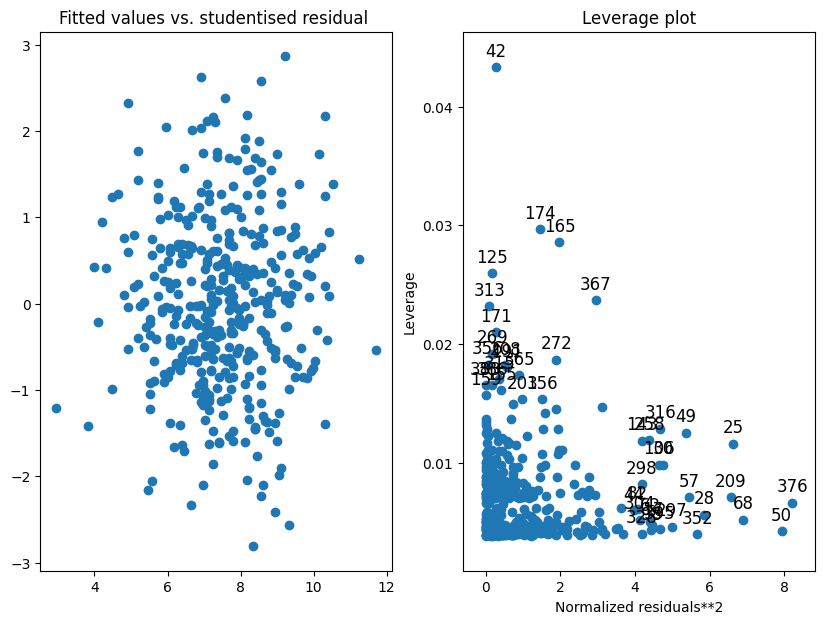

In [27]:
figure, ax = plt.subplots(1, 2, figsize=(10,7))

influence_metrics =  OLSInfluence(smaller_results)
leverage_plot = plot_leverage_resid2(smaller_results, ax=ax[1])

ax[0].scatter(x=smaller_results.fittedvalues, y=influence_metrics.resid_studentized)
ax[0].set_title('Fitted values vs. studentised residual ')

ax[1].set_title('Leverage plot')


**3. Investigating the t-statistic for the null hypothesis - without an intercept**

In [28]:
#Generate some sythetic data
X = np.random.normal(size=100)
e = np.random.normal(size=100)
y = 2*X + e

*(a) Perform a simple linear regression of x onto y, without an intercept. Report the coefficient estimate $\beta$, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis*

The coefficient estimate is 2.15, which is very close to the true value. The t-statistic is very large and this has resulted in a p-value that is essentially 0. We expect this as we know there is a true relationship between response and predictor. The standard error is 0.089. This is an estimate the true value of the standard error is equal to

$$
SE(\beta) = \sqrt{\frac{Var(e)}{\sum_{i=1}^{n}(x_{i} - \bar{x})^{2}}}
$$

We show below that this is equal to 0.1 meaning the estimate is very close.

In [29]:
x_bar = X.mean()
se_beta = (1/sum([(x - x_bar)**2 for x in X]))**(1/2)
print(se_beta)

0.09960283481047341


In [30]:
x_onto_y_model =  OLS(y, X)
x_onto_y_model = x_onto_y_model.fit()
x_onto_y_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.789
Model:                            OLS   Adj. R-squared (uncentered):              0.787
Method:                 Least Squares   F-statistic:                              370.5
Date:                Wed, 15 May 2024   Prob (F-statistic):                    3.09e-35
Time:                        20:52:40   Log-Likelihood:                         -147.98
No. Observations:                 100   AIC:                                      298.0
Df Residuals:                      99   BIC:                                      300.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.0478      0.106     19.249      0.000       1.837       2.259
==============================================================================
Omnibus:                        0.884   Durbin-Watson:                   2.130
Prob(Omnibus):                  0.643   Jarque-Bera (JB):                0.772
Skew:                           0.213   Prob(JB):                        0.680
Kurtosis:                       2.945   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*(b) As in (a) but a regression of y onto x*

In this scenario note that our model is:

$$
x_{i} = y_{i}/2 - e/2
$$

The first thing we notice is the t-statistic is exactly same with a value of 24.113. The coeffcient is 0.37 which isnt too far from the true value of 0.5. The standard error is 0.016.

In [31]:
y_onto_x_model =  OLS(X, y)
y_onto_x_model = y_onto_x_model.fit()
y_onto_x_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.789
Model:                            OLS   Adj. R-squared (uncentered):              0.787
Method:                 Least Squares   F-statistic:                              370.5
Date:                Wed, 15 May 2024   Prob (F-statistic):                    3.09e-35
Time:                        20:52:40   Log-Likelihood:                         -64.465
No. Observations:                 100   AIC:                                      130.9
Df Residuals:                      99   BIC:                                      133.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3854      0.020     19.249      0.000       0.346       0.425
==============================================================================
Omnibus:                        1.846   Durbin-Watson:                   2.219
Prob(Omnibus):                  0.397   Jarque-Bera (JB):                1.658
Skew:                          -0.315   Prob(JB):                        0.437
Kurtosis:                       2.955   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*(c) For the regression of Y onto X without an intercept, the tstatistic for $H0 : \beta = 0$ takes the form $\hat{\beta}/SE(\hat{\beta})$, where $$SE(\hat{\beta}) = \sqrt{\frac{\sum_{i=1}^{n}(y_{i} - x_{i}\hat{\beta})^{2}}{(n-1)\sum_{j=1}^{n}x_{j}^{2}}}$$ Show algebraically that the t-statistic can be written as $$\frac{(\sqrt{n-1})\sum_{i=1}^{n}x_{i}y_{i}}{\sqrt{\sum_{i=1}^{n}x_{i}^{2}\sum_{i=1}^{n}y_{i}^{2}- \sum_{j=1}^{n}(y_{j}x_{j})^{2}}} $$*

We can show this by 'reverse engineering' the expression for $\hat{\beta}$ without an intercept, we have,

$$
\hat{\beta} = \frac{\sum_{i=1}^{n}x_{i}y_{i}}{\sum_{i=1}^{n}x^{2}_{i}}
$$

This means we need to show the given formula for the standard error can be arranged such that,

$$
SE(\hat{\beta}) = \frac{\sqrt{\sum_{i=1}^{n}x_{i}^{2}\sum_{i=1}^{n}y_{i}^{2}- (\sum_{j=1}^{n}y_{j}x_{j})^{2}}}{\sqrt{(n-1)}\sum_{j=1}^{n}x_{j}^{2}}
$$

To make things easier lets begin with the given expression for the $SE(\beta)$ squared,

$$
SE(\hat{\beta})^{2} = \frac{\sum_{i=1}^{n}(y_{i} - x_{i}\hat{\beta})^{2}}{(n-1)\sum_{j=1}^{n}x_{j}^{2}}
$$
$$
= \frac{\sum_{i=1}^{n}(y_{i}^{2} - 2x_{i}y_{i}\hat{\beta} + (x_{i}\hat{\beta})^{2})}{(n-1)\sum_{j=1}^{n}x_{j}^{2}}
$$

Then just focusing on the numerator and applying the laws of summation we find

$$
= \sum_{i=1}^{n}y_{i}^{2} - 2\hat{\beta}\sum_{i=1}^{n}x_{i}y_{i} + \hat{\beta}^{2}\sum_{i=1}^{n}x^{2}_{i}
$$

Then subbing in $\hat{\beta}$

$$
= \sum_{i=1}^{n}y_{i}^{2} - 2\frac{\sum_{i=1}^{n}x_{i}y_{i}}{\sum_{i=1}^{n}x^{2}_{i}}\sum_{i=1}^{n}x_{i}y_{i} + (\frac{\sum_{i=1}^{n}x_{i}y_{i}}{\sum_{i=1}^{n}x^{2}_{i}})^{2}\sum_{i=1}^{n}x^{2}_{i}
$$

Some algebra to cancel common terms and simplify
$$
= \sum_{i=1}^{n}y_{i}^{2} - 2\frac{(\sum_{i=1}^{n}x_{i}y_{i})^{2}}{\sum_{i=1}^{n}x^{2}_{i}} + \frac{(\sum_{i=1}^{n}x_{i}y_{i})^{2}}{\sum_{i=1}^{n}x^{2}_{i}}
$$
$$
= \sum_{i=1}^{n}y_{i}^{2} - \frac{(\sum_{i=1}^{n}x_{i}y_{i})^{2}}{\sum_{i=1}^{n}x^{2}_{i}} 
$$

Reintroducing the denominator we have

$$
= \frac{\sum_{i=1}^{n}y_{i}^{2}}{(n-1)\sum_{j=1}^{n}x_{j}^{2}} - \frac{(\sum_{i=1}^{n}x_{i}y_{i})^{2}/\sum_{i=1}^{n}x^{2}_{i}}{(n-1)\sum_{j=1}^{n}x_{j}^{2}}
$$

As we have alreayd set up the SE we need to find above it is now obvious that we need multiply the top and bottom of each term by $\sum_{i=1}^{n}x^{2}_{i}$. This gives,

$$
= \frac{\sum_{i=1}^{n}y_{i}^{2}\sum_{j=1}^{n}x_{j}^{2}}{(n-1)(\sum_{j=1}^{n}x_{j}^{2})^{2}} - \frac{(\sum_{i=1}^{n}x_{i}y_{i})^{2}}{(n-1)(\sum_{j=1}^{n}x_{j}^{2})^{2}}
$$
$$
= \frac{\sum_{i=1}^{n}y_{i}^{2}\sum_{j=1}^{n}x_{j}^{2} - (\sum_{i=1}^{n}x_{i}y_{i})^{2}}{(n-1)(\sum_{j=1}^{n}x_{j}^{2})^{2}}
$$

Remembering that we initially squared the standard error, we now take th square root for,

$$
SE(\hat{\beta}) = \frac{\sqrt{\sum_{i=1}^{n}y_{i}^{2}\sum_{j=1}^{n}x_{j}^{2} - (\sum_{i=1}^{n}x_{i}y_{i})^{2}}}{\sqrt{(n-1)}\sum_{j=1}^{n}x_{j}^{2}}
$$

Which is what we needed to prove.

*(e) Using the results from (c), argue that the t-statistic for the regression of y onto x is the same as the t-statistic for the regression of x onto y.*

The result above shows that the t-statistic is equivalent for the regression of y onto a x and vice versa. To this you only need to realise the the expression for $\hat{\beta}$ would be

$$
\hat{\beta} = \frac{\sum_{i=1}^{n}x_{i}y_{i}}{\sum_{i=1}^{n}y^{2}_{i}}
$$

And the expression for the standard error would be 

$$
SE(\hat{\beta}) = \sqrt{\frac{\sum_{i=1}^{n}(x_{i} - y_{i}\hat{\beta})^{2}}{(n-1)\sum_{j=1}^{n}y_{j}^{2}}}
$$

Clearly in this scenario aswell,

$$
\frac{\hat{\beta}}{SE(\hat{\beta})} = \frac{(\sqrt{n-1})\sum_{i=1}^{n}x_{i}y_{i}}{\sqrt{\sum_{i=1}^{n}x_{i}^{2}\sum_{i=1}^{n}y_{i}^{2}- \sum_{j=1}^{n}(y_{j}x_{j})^{2}}} 
$$


**4. Fitting models to simulated data**

*(a) Create a vector, x, containing 100 observations drawn from a N(0, 1) distribution. This represents a feature, X.*

In [32]:
X = np.random.normal(size=100)

*(b) create a vector, eps, containing 100 observations drawn from a N(0, 0.25) distribution*

In [33]:
eps = np.random.normal(loc=0, scale=0.25, size=100)

*(c) Using x and eps, generate a vector y according to the model $$Y = -1 + 0.5X + \epsilon$$*

In [34]:
y = -1 + 0.5*X + eps

*(d) Create a scatterplot displaying the relationship between x and y. Comment on what you observe.*

We observe a linear relationship between the response and predictor with a small amount of random fluctuation. Almost all of the response values are negative.

Text(0, 0.5, 'y')

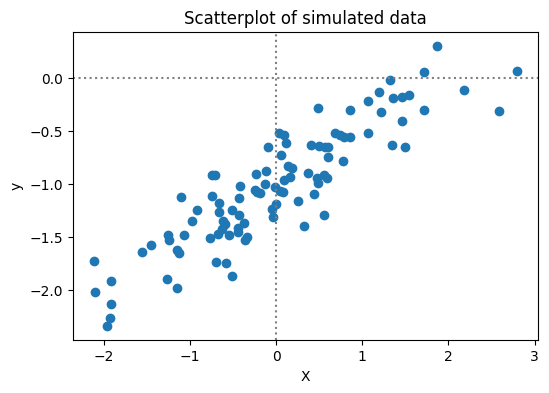

In [35]:
figure = plt.figure(figsize=(6,4))
ax = figure.add_subplot()

ax.axvline(0, ls=':', c='grey')
ax.axhline(0, ls=':', c='grey')

ax.scatter(x=X, y=y)
ax.set_title('Scatterplot of simulated data')
ax.set_xlabel('X')
ax.set_ylabel('y')


*(e) Fit a least squares linear model to predict y using x. Comment on the model obtained. How do $\hat{\beta}_{0}$ and $\hat{\beta}_{1}$ compare to $\beta_{0}$ and $\beta_{1}$?*

The estimates for $\beta_{0}$ and $\beta_{1}$ are close to their true values and both are statistically significant, that is we reject the null hypothesis that the true coefficients are zero.

The model is also reasonably well fit to the data with an $R^{2}$ statistic of 0.818.


In [36]:
X_wintercept = np.hstack([X.reshape(-1, 1), np.ones_like(X.reshape(-1, 1))])
simulated_lr = OLS(y, X_wintercept)
simulated_results = simulated_lr.fit()
simulated_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     384.3
Date:                Wed, 15 May 2024   Prob (F-statistic):           1.10e-35
Time:                        20:52:40   Log-Likelihood:                -3.3160
No. Observations:                 100   AIC:                             10.63
Df Residuals:                      98   BIC:                             15.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4848      0.025     19.604      0.000       0.436       0.534
const         -1.0229      0.025    -40.485      0.000      -1.073      -0.973
==============================================================================
Omnibus:                        0.974   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.615   Jarque-Bera (JB):                1.038
Skew:                          -0.146   Prob(JB):                        0.595
Kurtosis:                       2.595   Cond. No.                         1.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*(f) Display the least squares line on the scatter plot Draw the population regression line on the plot, in a different color.*


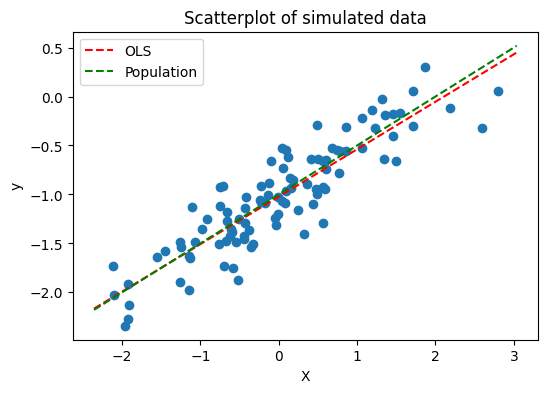

In [37]:
figure = plt.figure(figsize=(6,4))
ax = figure.add_subplot()

ax.scatter(x=X, y=y)

#plotting regression lines
ols_coefficient, ols_intercept = simulated_results.params
x_lim = ax.get_xlim()
y_lim_ols = [ols_intercept + x_lim[0]*ols_coefficient, ols_intercept + x_lim[1]*ols_coefficient]
y_lim_pop = [-1 + x_lim[0]*0.5, -1 + x_lim[1]*0.5]

ax.plot(x_lim, y_lim_ols, ls='--', c='red', label='OLS')
ax.plot(x_lim, y_lim_pop, ls='--', c='green', label='Population')

ax.set_title('Scatterplot of simulated data')
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.legend()

*(g) Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model should remain the same. Describe your results.*

We notice that the coefficient estimates are closer to their true values and the standard error for the coefficient estimates has decreased. This is expected because the standard error is directly proportional to $\epsilon$ (the irreducible noise)

In [38]:
eps_less_noise = np.random.normal(loc=0, scale=0.1, size=100) #variance decreases 0.25 -> 0.1
y = -1 + 0.5 * X + eps_less_noise

simulated_lr = OLS(y, X_wintercept)
simulated_results = simulated_lr.fit()
simulated_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     1988.
Date:                Wed, 15 May 2024   Prob (F-statistic):           6.88e-67
Time:                        20:52:40   Log-Likelihood:                 73.709
No. Observations:                 100   AIC:                            -143.4
Df Residuals:                      98   BIC:                            -138.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5104      0.011     44.589      0.000       0.488       0.533
const         -0.9922      0.012    -84.834      0.000      -1.015      -0.969
==============================================================================
Omnibus:                        4.288   Durbin-Watson:                   2.500
Prob(Omnibus):                  0.117   Jarque-Bera (JB):                3.771
Skew:                           0.466   Prob(JB):                        0.152
Kurtosis:                       3.189   Cond. No.                         1.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

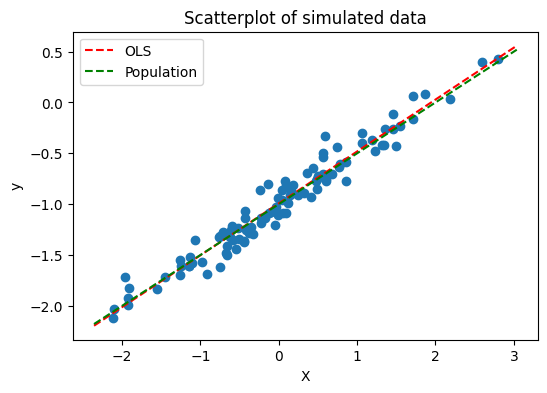

In [39]:
figure = plt.figure(figsize=(6,4))
ax = figure.add_subplot()

ax.scatter(x=X, y=y)

#plotting regression lines
ols_coefficient, ols_intercept = simulated_results.params
x_lim = ax.get_xlim()
y_lim_ols = [ols_intercept + x_lim[0]*ols_coefficient, ols_intercept + x_lim[1]*ols_coefficient]
y_lim_pop = [-1 + x_lim[0]*0.5, -1 + x_lim[1]*0.5]

ax.plot(x_lim, y_lim_ols, ls='--', c='red', label='OLS')
ax.plot(x_lim, y_lim_pop, ls='--', c='green', label='Population')

ax.set_title('Scatterplot of simulated data')
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.legend()

*(h) Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model should remain the same. Describe your results.*

We notice that the coefficient estimates are further to their true values and the standard error for the coefficient estimates has increased. There is also a clear difference between the estimated and true regression lines on the plot.

In [40]:
eps_more_noise = np.random.normal(loc=0, scale=0.5, size=100) #variance decreases 0.25 -> 0.5
y = -1 + 0.5 * X + eps_more_noise

simulated_lr = OLS(y, X_wintercept)
simulated_results = simulated_lr.fit()
simulated_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     117.1
Date:                Wed, 15 May 2024   Prob (F-statistic):           2.00e-18
Time:                        20:52:40   Log-Likelihood:                -69.108
No. Observations:                 100   AIC:                             142.2
Df Residuals:                      98   BIC:                             147.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5167      0.048     10.823      0.000       0.422       0.611
const         -0.9831      0.049    -20.152      0.000      -1.080      -0.886
==============================================================================
Omnibus:                        1.748   Durbin-Watson:                   2.164
Prob(Omnibus):                  0.417   Jarque-Bera (JB):                1.323
Skew:                          -0.007   Prob(JB):                        0.516
Kurtosis:                       2.437   Cond. No.                         1.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

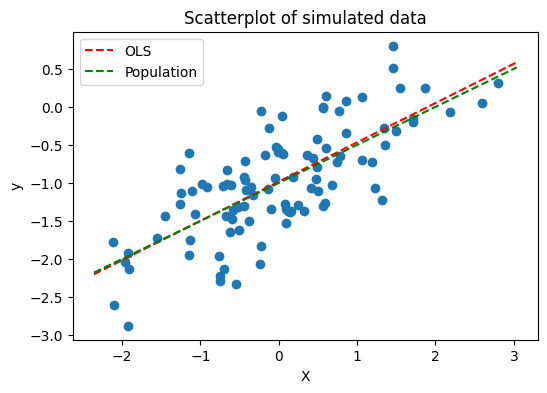

In [41]:
figure = plt.figure(figsize=(6,4))
ax = figure.add_subplot()

ax.scatter(x=X, y=y)

#plotting regression lines
ols_coefficient, ols_intercept = simulated_results.params
x_lim = ax.get_xlim()
y_lim_ols = [ols_intercept + x_lim[0]*ols_coefficient, ols_intercept + x_lim[1]*ols_coefficient]
y_lim_pop = [-1 + x_lim[0]*0.5, -1 + x_lim[1]*0.5]

ax.plot(x_lim, y_lim_ols, ls='--', c='red', label='OLS')
ax.plot(x_lim, y_lim_pop, ls='--', c='green', label='Population')

ax.set_title('Scatterplot of simulated data')
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.legend()

**5. Exploring collinearity**

*(a) Create a simulated linear model where y is a function of $x_{1}$ and $x_{2}$ and the predictors are correlated.*

We will create a linear model of the form

$$
y = 2 + 2x_{1} + 0.3x_{2} + e
$$

In [42]:
x1 = np.random.uniform(0, 1, 100)
x2 = 0.5 * x1 + np.random.normal(size=100)/10
eps = np.random.normal(size=100)
y = 2 + 2 * x1 + 0.3 * x2 + eps

*(b) What is the correlation between $x_{1}$ and $x_{2}$? Create a scatterplot displaying the relationship between the variables.*

The correlation between $x_{1}$ and $x_{2}$ is approximately 0.8. The realtionship is visualised below.

In [43]:
np.corrcoef(x1, x2)

array([[1.       , 0.7916139],
       [0.7916139, 1.       ]])

Text(0, 0.5, 'x2')

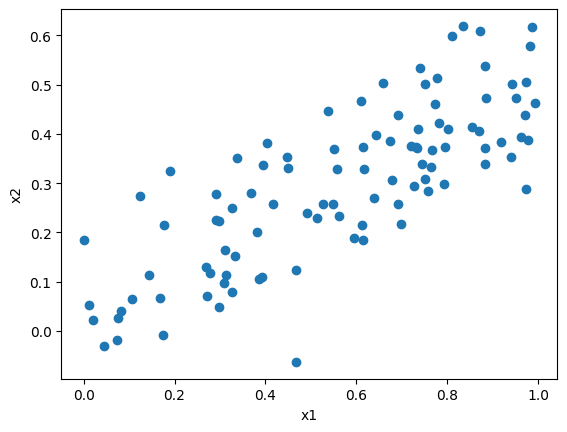

In [44]:
figure = plt.figure()
ax = figure.add_subplot()

ax.scatter(x1, x2)
ax.set_xlabel('x1')
ax.set_ylabel('x2')

*(c) Using this data, fit a least squares regression to predict y using $x_{1}$ and $x_{2}$. Describe the results obtained. What are $\hat{\beta}_{0}$, $\hat{\beta}_{1}$, and $\hat{\beta}_{2}$? How do these relate to the true $\beta_{0}$, $\beta_{1}$, and $\beta_{2}$? Can you reject the null hypothesis $H0 : \beta_{1} = 0$? How about the null hypothesis $H0 : \beta_{2} = 0$?*

The coefficients for both $x_{1}$ and $x_{2}$ have been overestimated whilst the coefficient for the intercept is underestimated. 

Given this summary, we can reject the null hypothesis for $x_{1}$ but cannot for $x_{2}$. However, there is a true relationship between y and $x_{2}$.

In [45]:
X = np.hstack([x1.reshape(-1, 1), x2.reshape(-1, 1), np.ones_like(x1.reshape(-1, 1))])
regression_x1_x2 = OLS(y, X)
results_x1_x2 = regression_x1_x2.fit()
results_x1_x2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     17.61
Date:                Wed, 15 May 2024   Prob (F-statistic):           2.99e-07
Time:                        20:52:41   Log-Likelihood:                -136.56
No. Observations:                 100   AIC:                             279.1
Df Residuals:                      97   BIC:                             286.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.1027      0.563      3.734      0.000       0.985       3.220
x2            -0.1356      0.982     -0.138      0.890      -2.085       1.814
const          2.0593      0.220      9.340      0.000       1.622       2.497
==============================================================================
Omnibus:                        0.786   Durbin-Watson:                   2.237
Prob(Omnibus):                  0.675   Jarque-Bera (JB):                0.351
Skew:                          -0.064   Prob(JB):                        0.839
Kurtosis:                       3.261   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*(d) Now fit a least squares regression to predict y using only $x_{1}$. Comment on your results. Can you reject the null hypothesis $H0 : \beta_{1} = 0$?*

The first thing we notice is the coefficient estimates for $x_{1}$ and the intercept are closer to their true values.

We do not reject the null hypothesis that $\beta_{1}$ is equal to zero as the p-value is essentially zero.

In [46]:
X = np.hstack([x1.reshape(-1, 1), np.ones_like(x1.reshape(-1, 1))])
regression_x1 = OLS(y, X)
results_x1 = regression_x1.fit()
results_x1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     35.55
Date:                Wed, 15 May 2024   Prob (F-statistic):           3.93e-08
Time:                        20:52:41   Log-Likelihood:                -136.57
No. Observations:                 100   AIC:                             277.1
Df Residuals:                      98   BIC:                             282.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.0411      0.342      5.963      0.000       1.362       2.720
const          2.0539      0.216      9.515      0.000       1.626       2.482
==============================================================================
Omnibus:                        0.908   Durbin-Watson:                   2.235
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.445
Skew:                          -0.070   Prob(JB):                        0.801
Kurtosis:                       3.296   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*(e) Now fit a least squares regression to predict y using only $x_{2}$. Comment on your results. Can you reject the null hypothesis $H0 : \beta_{2} = 0$?*

Similar to the above we find the coefficients are much closer to their true values. Furthermore, when we fit the model with just $x_{2}$ the coefficient for this predictor becomes statistically significant.

In [47]:
X = np.hstack([x2.reshape(-1, 1), np.ones_like(x1.reshape(-1, 1))])
regression_x2 = OLS(y, X)
results_x2 = regression_x2.fit()
results_x2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     18.79
Date:                Wed, 15 May 2024   Prob (F-statistic):           3.54e-05
Time:                        20:52:41   Log-Likelihood:                -143.27
No. Observations:                 100   AIC:                             290.5
Df Residuals:                      98   BIC:                             295.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.7678      0.639      4.335      0.000       1.501       4.035
const          2.3869      0.215     11.090      0.000       1.960       2.814
==============================================================================
Omnibus:                        6.189   Durbin-Watson:                   2.210
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                7.211
Skew:                          -0.324   Prob(JB):                       0.0272
Kurtosis:                       4.145   Cond. No.                         6.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*(f) Do the results obtained in (c)–(e) contradict each other? Explain your answer.*

The results do contradict each other. When we fit the multiple linear regression model with both $x_{1}$ and $x_{2}$ the summary states that the coefficient for $x_{2}$ is not significant. However, when we fit the model for just $x_{2}$ the summary states that this predictor is significant.

This has been caused by the presence of collinearity between the predictors. Because the predictors are correlated it is more difficult to distinguish the individual effects of the predictors on the response. This leads to higher standard errors for predictors which means larger p-values.

**6. Boston Dataset - Predicting per capital crime rate**

In [48]:
boston_df = pd.read_csv(r'C:\Users\caine\OneDrive\Documents\statistical_learning_problems\0 datasets\Boston.csv')

In [49]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [50]:
boston_df.shape

(506, 14)

In [51]:
boston_df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [52]:
boston_df = boston_df.dropna()

In [53]:
boston_df.shape

(394, 14)

*(a) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.*

In [54]:
crime_rate  = boston_df['CRIM'].to_numpy(dtype=float)

intercept = np.ones((len(boston_df), 1))
predictors = boston_df.columns.drop('CRIM').to_list()


simple_linear_regression_results = pd.DataFrame(
    columns = ['Predictor', 'Coefficient', 'P-value', 'T-statistic']
)

for predictor in predictors:
    
    model = OLS(crime_rate, np.hstack([intercept, boston_df[predictor].to_numpy().reshape((-1, 1))]))
    result = model.fit()
    predictor_statistics = [predictor, result.params[1], result.pvalues[1], result.tvalues[1]]

    simple_linear_regression_results.loc[len(simple_linear_regression_results), :] = predictor_statistics

simple_linear_regression_results.sort_values(['Coefficient'], ascending=False)


,Predictor,Coefficient,P-value,T-statistic
3,NOX,33.857255,0.0,9.061499
9,PTRATIO,1.127451,0.0,5.450713
7,RAD,0.64878,0.0,15.188545
11,LSTAT,0.581609,0.0,10.311161
1,INDUS,0.521574,0.0,8.425017
5,AGE,0.112622,0.0,7.189341
8,TAX,0.030664,0.0,13.411974
10,B,-0.039811,0.0,-8.290869
0,ZN,-0.072253,0.000173,-3.791354
12,MEDV,-0.399813,0.0,-8.569893


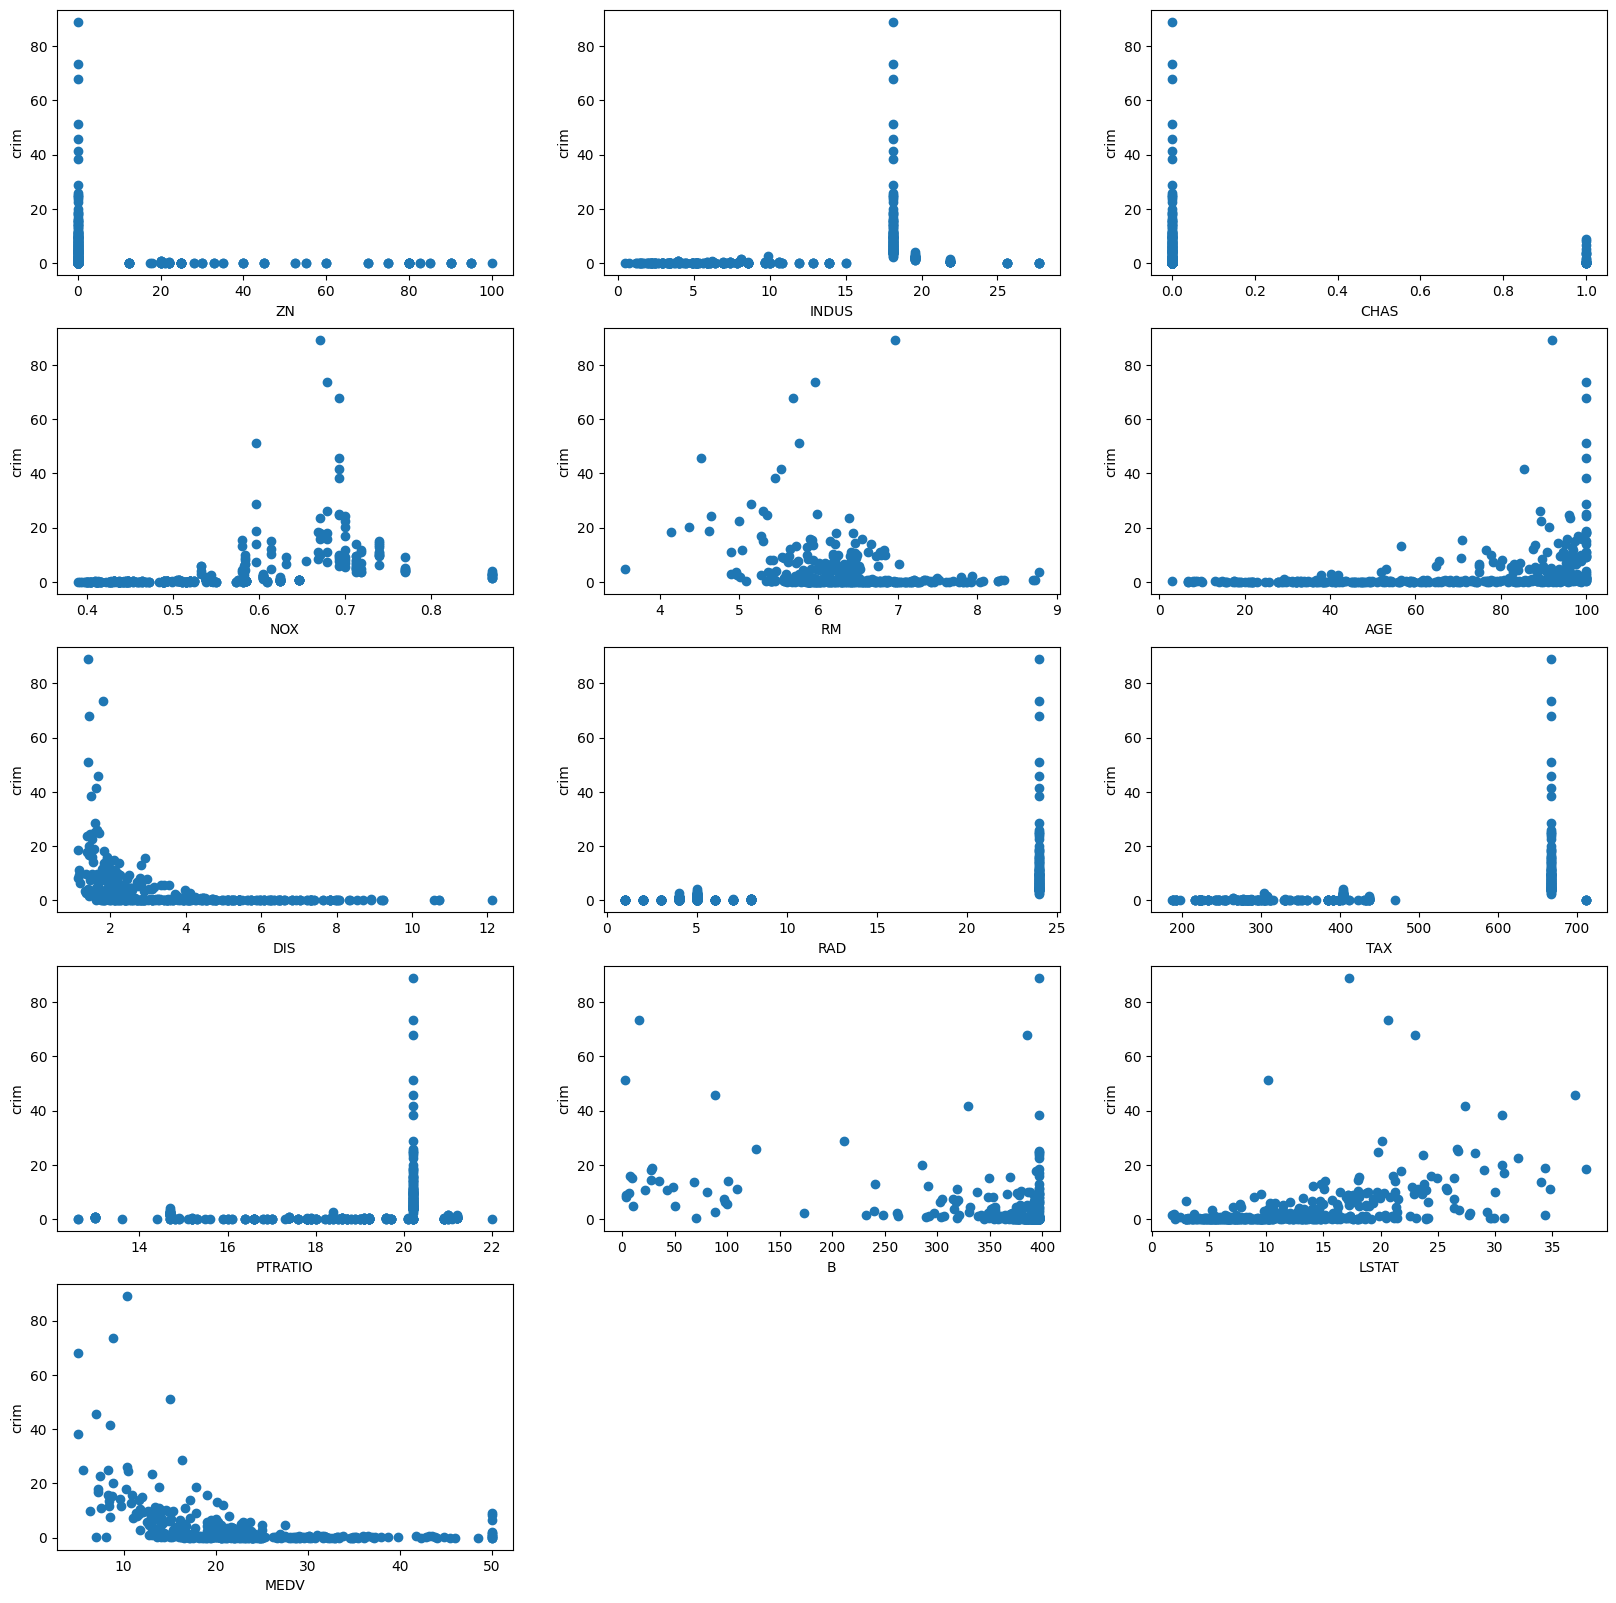

In [56]:
figure = plt.figure(figsize=(20,20))

for i, predictor in enumerate(predictors):
    ax = figure.add_subplot(5, 3, i+1)
    ax.scatter(x=boston_df[predictor], y=crime_rate)
    ax.set_xlabel(predictor)
    ax.set_ylabel('crim')
    

*(b) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis $H_{0} : \beta_{j} = 0$?*

The results of the multiple linear regression model suggest that at least one of the predictors is significantly associated with the crime rate. This is shown by the F-statistic which has a probability given of null of essentially zero.

Notably, the coefficients for each predictor in the multiple linear regression model are wildly different from the those obtained by fitting individual models. This indicates collinearity between the predictors.

Finally, when we fit the multiple linear regression model we find the null hypothesis cannot be rejected at the 1% level for:

* Zn - proportion of residents in in lots over 25,000 sq.ft
* Indus - proportion of non-retail businesses
* chas -  Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* nox -  nitric oxides concentration (parts per 10 million)
* rm -  average number of rooms per dwelling
* age -  proportion of owner-occupied units built prior to 1940
* tax - full-value property-tax rate per $10,000
* ptratio - pupil-teacher ratio by town
* lstats - % lower status of the population
* black - the proportion of blacks by town

In [57]:
mlr_model = OLS(crime_rate, boston_df[predictors])
mlr_result = mlr_model.fit()
mlr_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.511
Model:                            OLS   Adj. R-squared (uncentered):              0.494
Method:                 Least Squares   F-statistic:                              30.63
Date:                Wed, 15 May 2024   Prob (F-statistic):                    2.20e-51
Time:                        20:53:43   Log-Likelihood:                         -1321.5
No. Observations:                 394   AIC:                                      2669.
Df Residuals:                     381   BIC:                                      2721.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ZN             0.0463      0.023      2.030      0.043       0.001       0.091
INDUS         -0.0591      0.103     -0.573      0.567      -0.262       0.144
CHAS          -1.2587      1.467     -0.858      0.391      -4.143       1.626
NOX           -4.8235      5.562     -0.867      0.386     -15.760       6.113
RM             1.6242      0.698      2.326      0.021       0.251       2.997
AGE           -0.0038      0.023     -0.169      0.866      -0.048       0.041
DIS           -0.7754      0.317     -2.445      0.015      -1.399      -0.152
RAD            0.5710      0.101      5.673      0.000       0.373       0.769
TAX           -0.0042      0.006     -0.673      0.501      -0.016       0.008
PTRATIO       -0.0348      0.182     -0.191      0.848      -0.393       0.323
B             -0.0060      0.005     -1.312      0.190      -0.015       0.003
LSTAT          0.2312      0.084      2.752      0.006       0.066       0.396
MEDV          -0.1916      0.077     -2.502      0.013      -0.342      -0.041
==============================================================================
Omnibus:                      508.392   Durbin-Watson:                   1.670
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48324.242
Skew:                           6.234   Prob(JB):                         0.00
Kurtosis:                      55.803   Cond. No.                     8.79e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*(c) How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.*

The plot shows that nox is an outlier when we consider the relationship between the simple and multiple linear regression coefficients. The nox coeffcients is large and positive in the simple model and large and negative in the multiple linear regression. To better understand the relationship between the coefficients in each model we should remove this predictor from the plot (see below).

Once this observation is removed we see that in general there a positive correlation between the coefficients in each model. That is, a larger coeffcient in the simple linear regression model is associated with a larger coeffcient in the multiple linear regression model. We also spot that once nox is removed rm also appears to be an outlier.

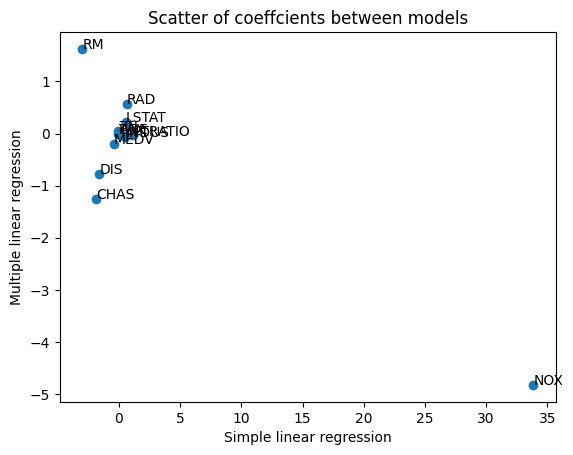

In [58]:
both_models_results = pd.merge(simple_linear_regression_results[['Predictor','Coefficient']], mlr_result.params.to_frame(), left_on='Predictor', right_index=True)
both_models_results.rename(columns={'Coefficient':'Simple Linear Regression', 0:'Multiple Linear Regression'}, inplace=True)
both_models_results = both_models_results[both_models_results['Predictor'] != 'intercept']


figure = plt.figure()
ax = figure.add_subplot()
ax.scatter(x=both_models_results['Simple Linear Regression'], y=both_models_results['Multiple Linear Regression'])
ax.set_title('Scatter of coeffcients between models')
ax.set_xlabel('Simple linear regression')
ax.set_ylabel('Multiple linear regression')
for x, y, predictor in zip(both_models_results['Simple Linear Regression'], both_models_results['Multiple Linear Regression'], both_models_results['Predictor']):
    ax.annotate(
        text=predictor,
        xy=(x, y)
    )


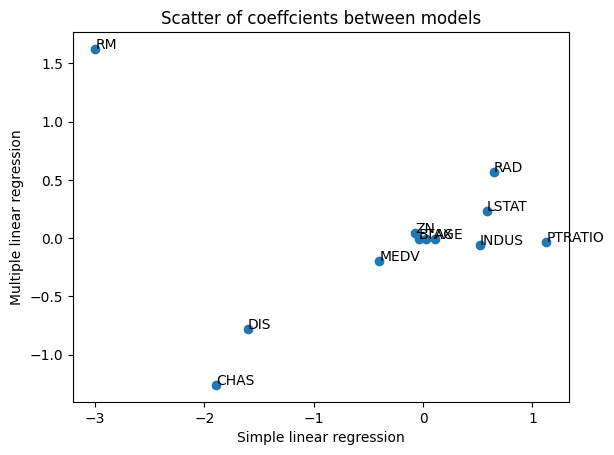

In [60]:
both_models_results = both_models_results[both_models_results['Predictor'] != 'NOX']


figure = plt.figure()
ax = figure.add_subplot()
ax.scatter(x=both_models_results['Simple Linear Regression'], y=both_models_results['Multiple Linear Regression'])
ax.set_title('Scatter of coeffcients between models')
ax.set_xlabel('Simple linear regression')
ax.set_ylabel('Multiple linear regression')
for x, y, predictor in zip(both_models_results['Simple Linear Regression'], both_models_results['Multiple Linear Regression'], both_models_results['Predictor']):
    ax.annotate(
        text=predictor,
        xy=(x, y)
    )